## **Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Import data**

In [28]:
df = pd.read_csv('ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


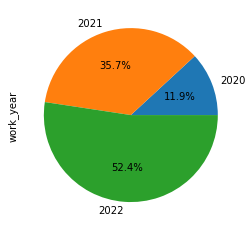

In [29]:
df.groupby('work_year')['work_year'].count().plot.pie(autopct="%1.1f%%");

In [30]:
df['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

## **Data Cleansing**

### Drop unecessary columns

In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


### Handling missing values

In [11]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Handling duplicated data

In [7]:
df.duplicated().sum()

0

There are 42 duplicate rows; will be dropped later.

In [13]:
df[df.duplicated(keep=False)].sort_values('job_title').head(6)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
597,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
406,2022,MI,FT,Data Analyst,58000,USD,58000,US,0,US,S
393,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
392,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
527,2022,SE,FT,Data Analyst,135000,USD,135000,US,100,US,M
528,2022,SE,FT,Data Analyst,100000,USD,100000,US,100,US,M


In [9]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [10]:
df = df.reset_index(drop=True)

Done. Duplicated rows have gone.

### Renaming the column value

In [11]:

df.experience_level.replace(['EN','MI','SE','EX'],['Entry-level','Mid-level','Senior-level', 'Expert-level'], inplace=True)


df.employment_type.replace(['PT','CT','FT','FL'],['Part-time','Contract','Full-time', 'Freelance'], inplace=True)


df.remote_ratio.replace([0,50,100],['Onsite','Hybrid','Remote'], inplace=True)


df.company_size.replace(['S','M','L'],['Small','Medium','Large'], inplace=True)

df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,Onsite,DE,Large
1,1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,Onsite,JP,Small
2,2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,Medium
3,3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,HN,Onsite,HN,Small
4,4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,Large


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    object
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(4), object(8)
memory usage: 57.0+ KB


### Checking the number of unique values

In [13]:
dict = {}
for col in df.columns:
    dict[col] = df[col].value_counts().shape[0]

pd.DataFrame(dict, index=['unique value count']).transpose()

,unique value count
Unnamed: 0,607
work_year,3
experience_level,4
employment_type,4
job_title,50
salary,272
salary_currency,17
salary_in_usd,369
employee_residence,57
remote_ratio,3


In [14]:
df.nunique()

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [15]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd
count,607.000000,607.000000,6.070000e+02,607.000000
mean,303.000000,2021.405272,3.240001e+05,112297.869852
std,175.370085,0.692133,1.544357e+06,70957.259411
min,0.000000,2020.000000,4.000000e+03,2859.000000
25%,151.500000,2021.000000,7.000000e+04,62726.000000
50%,303.000000,2022.000000,1.150000e+05,101570.000000
75%,454.500000,2022.000000,1.650000e+05,150000.000000
max,606.000000,2022.000000,3.040000e+07,600000.000000


## **Exploratory Data Analysis**

### Statistical Summary of Columns

In [18]:
all_columns = df.columns.to_list()
numerical = ['work_year', 'salary', 'salary_in_usd']
categorical = list(set(all_columns) - set(numerical))

In [19]:
df[numerical].describe()

,work_year,salary,salary_in_usd
count,607.000000,6.070000e+02,607.000000
mean,2021.405272,3.240001e+05,112297.869852
std,0.692133,1.544357e+06,70957.259411
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,7.000000e+04,62726.000000
50%,2022.000000,1.150000e+05,101570.000000
75%,2022.000000,1.650000e+05,150000.000000
max,2022.000000,3.040000e+07,600000.000000


In [20]:
df[categorical]

,Unnamed: 0,company_location,employment_type,experience_level,job_title,company_size,remote_ratio,employee_residence,salary_currency
0,0,DE,Full-time,Mid-level,Data Scientist,Large,Onsite,DE,EUR
1,1,JP,Full-time,Senior-level,Machine Learning Scientist,Small,Onsite,JP,USD
2,2,GB,Full-time,Senior-level,Big Data Engineer,Medium,Hybrid,GB,GBP
3,3,HN,Full-time,Mid-level,Product Data Analyst,Small,Onsite,HN,USD
4,4,US,Full-time,Senior-level,Machine Learning Engineer,Large,Hybrid,US,USD
...,...,...,...,...,...,...,...,...,...
602,602,US,Full-time,Senior-level,Data Engineer,Medium,Remote,US,USD
603,603,US,Full-time,Senior-level,Data Engineer,Medium,Remote,US,USD
604,604,US,Full-time,Senior-level,Data Analyst,Medium,Onsite,US,USD
605,605,US,Full-time,Senior-level,Data Analyst,Medium,Remote,US,USD


In [28]:
df[categorical].describe()

,job_title,company_size,company_location,experience_level,employment_type,salary_currency,remote_ratio,employee_residence
count,565,565,565,565,565,565,565,565
unique,50,3,50,4,4,17,3,57
top,Data Scientist,Medium,US,Senior-level,Full-time,USD,Remote,US
freq,130,290,318,243,546,359,346,295


### Univariate Analysis

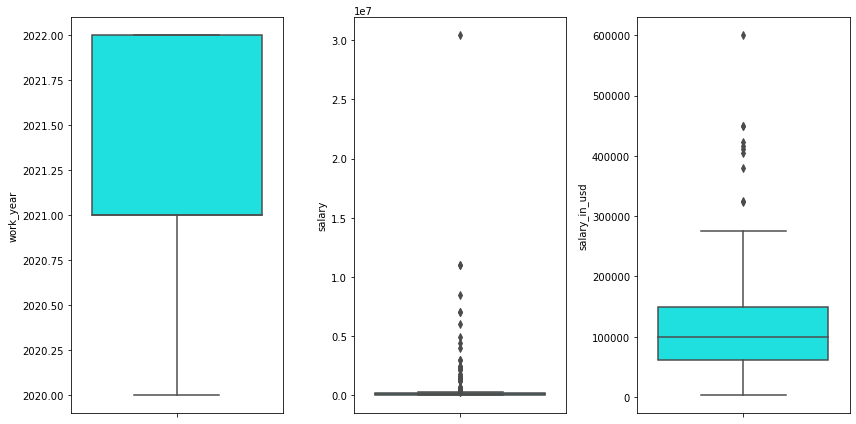

In [29]:
plt.figure(figsize=(12,6))

# plotting
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

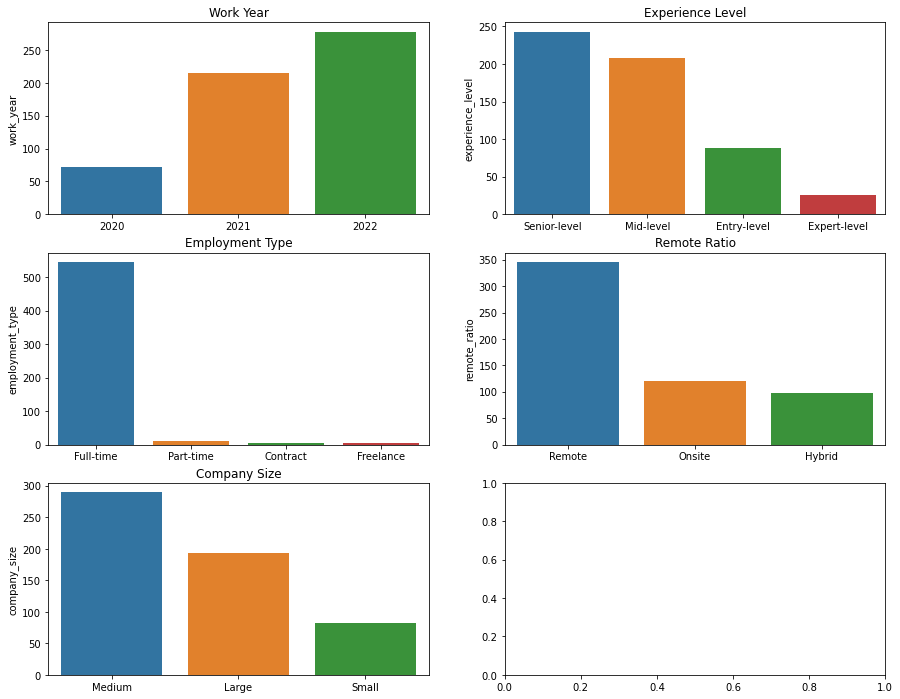

In [30]:
fig, axes = plt.subplots(3, 2, figsize = (15, 12))

sns.barplot(x = df["work_year"].value_counts().sort_values(ascending = False).index, y = df["work_year"].value_counts().sort_values(ascending = False), ax = axes[0][0])
axes[0][0].set_title("Work Year")

sns.barplot(x = df["experience_level"].value_counts().sort_values(ascending = False).index, y = df["experience_level"].value_counts().sort_values(ascending = False), ax = axes[0][1])
axes[0][1].set_title("Experience Level")

sns.barplot(x = df["employment_type"].value_counts().sort_values(ascending = False).index, y = df["employment_type"].value_counts().sort_values(ascending = False), ax = axes[1][0])
axes[1][0].set_title("Employment Type")

sns.barplot(x = df["remote_ratio"].value_counts().sort_values(ascending = False).index, y = df["remote_ratio"].value_counts().sort_values(ascending = False), ax = axes[1][1])
axes[1][1].set_title("Remote Ratio")

sns.barplot(x = df["company_size"].value_counts().sort_values(ascending = False).index, y = df["company_size"].value_counts().sort_values(ascending = False), ax = axes[2][0])
axes[2][0].set_title("Company Size");

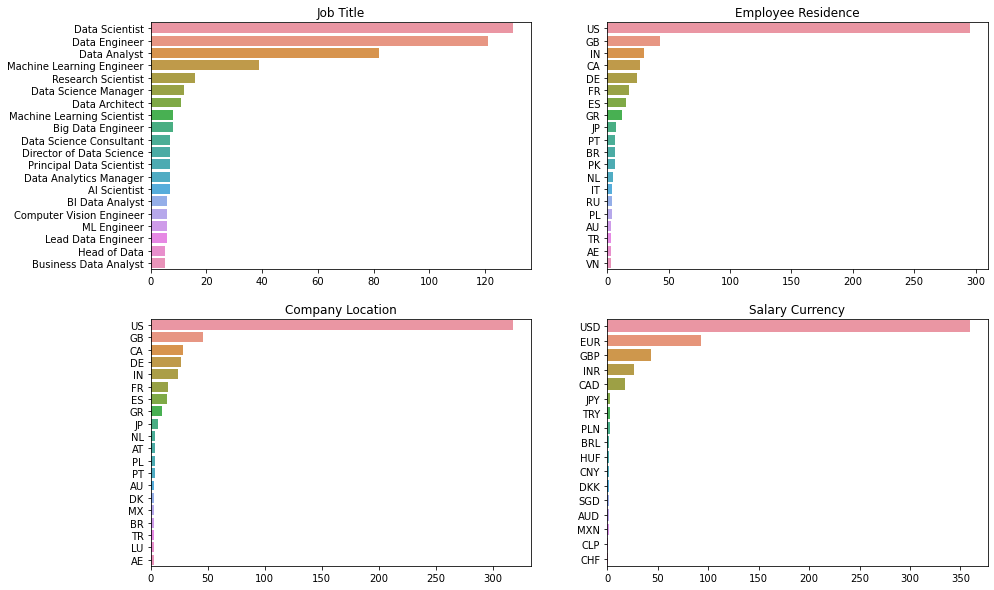

In [31]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

sns.barplot(x = df["job_title"].value_counts().sort_values(ascending = False).head(20), 
            y = df["job_title"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[0][0])
axes[0][0].set_title("Job Title")
axes[0][0].set_xlabel("")

sns.barplot(x = df["employee_residence"].value_counts().sort_values(ascending = False).head(20), 
            y = df["employee_residence"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[0][1])
axes[0][1].set_title("Employee Residence")
axes[0][1].set_xlabel("")

sns.barplot(x = df["company_location"].value_counts().sort_values(ascending = False).head(20), 
            y = df["company_location"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[1][0])
axes[1][0].set_title("Company Location")
axes[1][0].set_xlabel("")

sns.barplot(x = df["salary_currency"].value_counts().sort_values(ascending = False).head(20), 
            y = df["salary_currency"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[1][1])
axes[1][1].set_title("Salary Currency")
axes[1][1].set_xlabel("");

#### **Analysis 1: What is job with the highest salary in Data Science?**

Text(0.5, 1.0, 'Highest Salary Jobs')

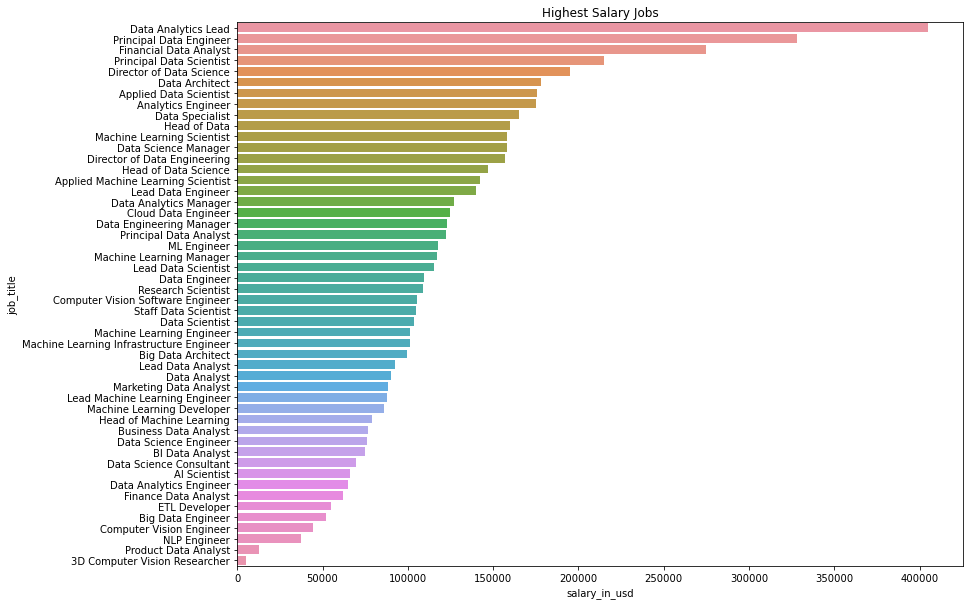

In [32]:
# Set the figure size
plt.figure(figsize = (13,10))

# plot a hist chart
sns.barplot(x = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending = False), 
            y = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending = False).index)
plt.xlabel = ("Salary in USD")
# plt.xticks(rotation='vertical')
plt.title("Highest Salary Jobs")

In [22]:
dftopsalary = ['salary_in_usd', 'job_title']
df[dftopsalary].max()

salary_in_usd                  600000
job_title        Staff Data Scientist
dtype: object

#### **Analysis 2: What are the top 10 data science jobs in 2022?**

In [23]:
df.groupby(['work_year']).agg(
    job_title = ('job_title','count')
).reset_index()

,work_year,job_title
0,2020,72
1,2021,217
2,2022,318


In [24]:
df.salary.value_counts()

100000    18
80000     18
120000    15
60000     15
150000    14
          ..
52800      1
161342     1
150075     1
19000      1
256000     1
Name: salary, Length: 272, dtype: int64

In [25]:
df22 = df[df["work_year"] == 2022]
df22.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
289,289,2022,Senior-level,Full-time,Data Engineer,135000,USD,135000,US,Remote,US,Medium
290,290,2022,Senior-level,Full-time,Data Analyst,155000,USD,155000,US,Remote,US,Medium
291,291,2022,Senior-level,Full-time,Data Analyst,120600,USD,120600,US,Remote,US,Medium
292,292,2022,Mid-level,Full-time,Data Scientist,130000,USD,130000,US,Onsite,US,Medium
293,293,2022,Mid-level,Full-time,Data Scientist,90000,USD,90000,US,Onsite,US,Medium


In [26]:
df22.job_title.value_counts().head(10)

Data Engineer                89
Data Scientist               77
Data Analyst                 73
Machine Learning Engineer    18
Data Architect                8
Data Science Manager          5
Research Scientist            4
Analytics Engineer            4
Data Analytics Manager        4
Applied Data Scientist        3
Name: job_title, dtype: int64

Text(0.5, 1.0, 'Top 10 Data Science Jobs in 2022')

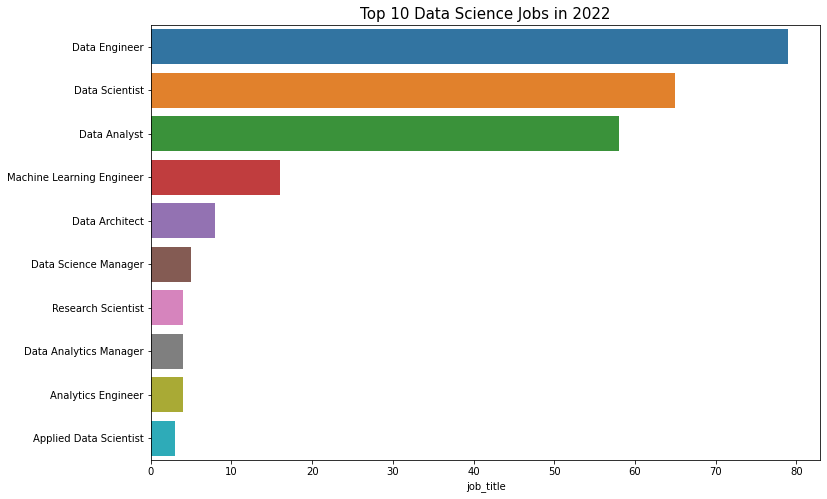

In [39]:
# Set the figure size
plt.figure(figsize = (12, 8))

# plot a bar chart
sns.barplot(x = df22["job_title"].value_counts().sort_values(ascending = False).head(10), 
            y = df22["job_title"].value_counts().sort_values(ascending = False).head(10).index)
plt.title('Top 10 Data Science Jobs in 2022', fontsize = 15)

Text(0.5, 1.0, 'Variation of remote ratio from 2020-2022')

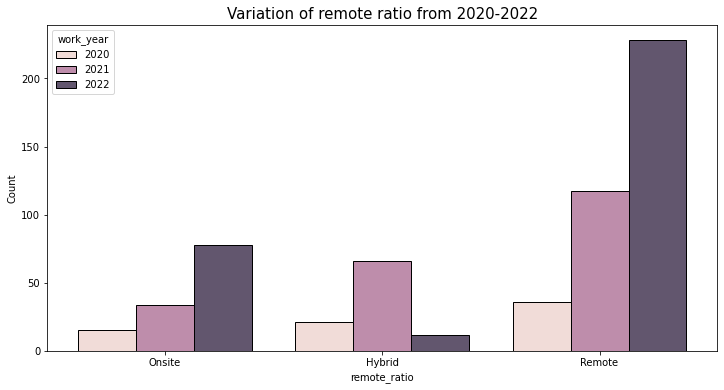

In [27]:
plt.figure(figsize = (12,6))

sns.histplot(data = df, x = 'remote_ratio', hue = 'work_year', multiple = 'dodge', shrink = 0.8)
plt.title('Variation of remote ratio from 2020-2022', fontsize = 15)

Text(0.5, 1.0, 'Salary variation with exprience level')

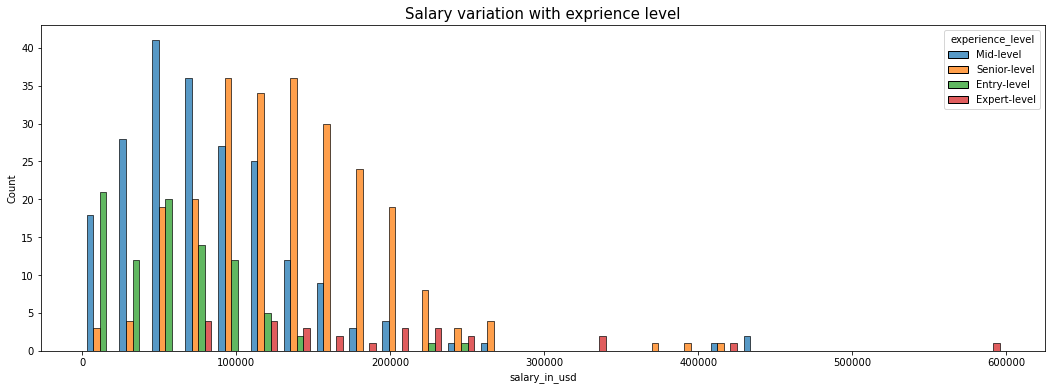

In [41]:
# Set the figure size
plt.figure(figsize = (18,6))

# plot a hist chart
sns.histplot(data = df, x = df.salary_in_usd, hue = 'experience_level', multiple = 'dodge', shrink = 0.8)
plt.title('Salary variation with exprience level', fontsize = 15)

Text(0.5, 1.0, 'Company Locations with Most Workers')

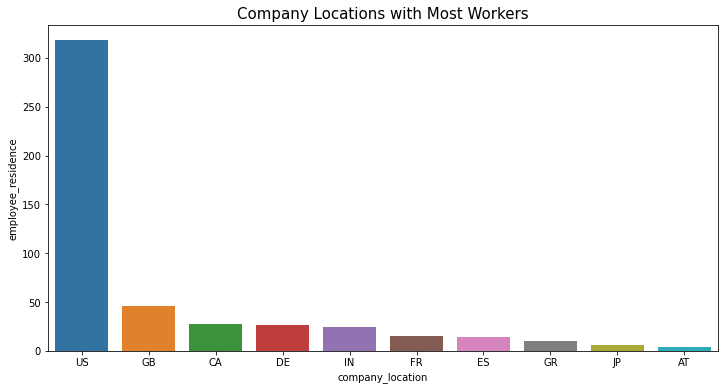

In [42]:
# Set the figure size
plt.figure(figsize = (12,6))

# plot a bar chart
sns.barplot(x = df.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10).index, 
            y = df.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10))
plt.title("Company Locations with Most Workers", fontsize = 15)